In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
# Load pretrained model
model = load_model('G_final.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [3]:
# Delete fully-connected layers (last three layers)
for i in range(3):
    model.pop()
    
# Freeze convolution layers to make them untrainable
for layer in model.layers:
    layer.trainable = False

In [4]:
# Add fully connected layers to the model

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4, name='dropout_3'))

#2nd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4, name='dropout_5'))

#Output Layer
model.add(Dense(49))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [5]:
data_dir = "C:/Users/s/Desktop/Cropped For classification/Cropped For classification"
os.chdir(data_dir)
categories = os.listdir()
print(len(categories))
data = []
labels = []
for category in categories:
    path = os.path.join(data_dir, category)
    os.chdir(path)
    img_label = categories.index(category)
    for img in os.listdir():
        try:
            img_array = cv2.imread(img ,1)
            dim = (30,30)
            img_array = cv2.resize(img_array,dim,interpolation = cv2.INTER_AREA)
            data.append(img_array)
            labels.append(category)
        except Exception as e:
            pass

48


In [6]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3263, 30, 30, 3)
(2936, 30, 30, 3) (327, 30, 30, 3) (2936,) (327,)


In [7]:
# 49 while data is only 48 classes, this is because categories start from 1 to 48
y_train = to_categorical(y_train, 49)
y_test = to_categorical(y_test, 49)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit model on training data
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.3)

Epoch 1/20
65/65 [==============================] - 4s 43ms/step - loss: 2.2885 - accuracy: 0.5431 - val_loss: 1.1386 - val_accuracy: 0.8218
Epoch 2/20
65/65 [==============================] - 3s 40ms/step - loss: 1.5668 - accuracy: 0.7528 - val_loss: 0.8313 - val_accuracy: 0.8842
Epoch 3/20
65/65 [==============================] - 3s 40ms/step - loss: 1.3361 - accuracy: 0.8000 - val_loss: 0.7160 - val_accuracy: 0.8933
Epoch 4/20
65/65 [==============================] - 3s 40ms/step - loss: 1.2248 - accuracy: 0.8238 - val_loss: 0.6415 - val_accuracy: 0.9012
Epoch 5/20
65/65 [==============================] - 3s 39ms/step - loss: 1.1026 - accuracy: 0.8370 - val_loss: 0.5871 - val_accuracy: 0.9001
Epoch 6/20
65/65 [==============================] - 3s 40ms/step - loss: 1.0325 - accuracy: 0.8550 - val_loss: 0.5309 - val_accuracy: 0.9092
Epoch 7/20
65/65 [==============================] - 3s 40ms/step - loss: 0.9709 - accuracy: 0.8560 - val_loss: 0.5077 - val_accuracy: 0.9171
Epoch 8/20
65

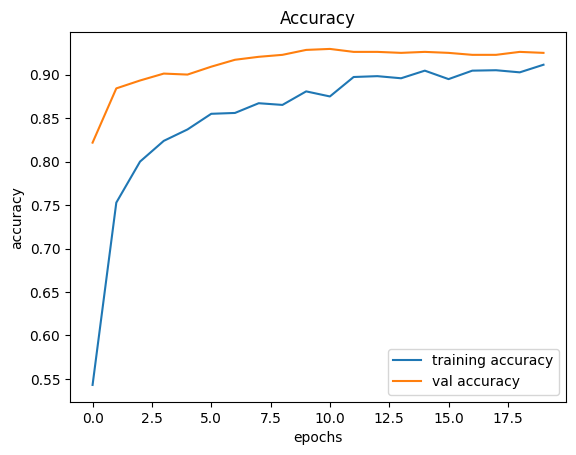

In [10]:
# Plot the accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

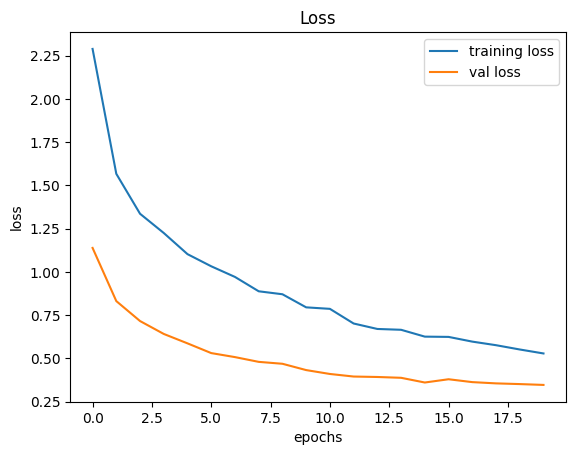

In [11]:
# Plot the Loss

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 10ms/step - loss: 0.3898 - accuracy: 0.9297


[0.3898257911205292, 0.9296635985374451]

In [13]:
model.save("C:/Users/s/Desktop/Cropped For classification/egyptian_model_transfer_learning.h5")